<p><img alt="DataOwl" width=150 src="http://gwsolutions.cl/Images/dataowl.png", align="left", hspace=0, vspace=5></p>

<h1 align="center">Probabilidades</h1>

<h4 align="center">Concepto de integral definida y Métodos Monte-Carlo</h4>
<pre><div align="center"> La idea de este notebook es que sirva para iniciarse en conceptos
básicos del Probabilidades, Cálculo Integral y los métodos disponibles
para la generación de datos pseudo-aleatorios.</div>

## Probabilidades

## 6. Momentos de una distribución

En principio, dado un estudio en el cual haya información recolectada, podríamos no saber muy bien qué tipos de distribución siguen nuestros datos. Sin embargo, si tenemos una idea de cuál podría ser, es posible aproximar los parámetros de los que depende solo viendo el comportamiento gráfico de la distribución. Esto es posible gracias al algunos valores característicos de las distribuciones llamados **momentos**.

Los más utilizados son los llamados *primeros momentos*, donde aparecen la esperanza, varianza, asimetría y curtosis, entre otras.

### 6.1 Distribuciones discretas

Para una variable aleatoria discreta definida sobre un espacio muestral $\Omega$ con función densidad $f_X$, se define su **esperanza** (*expected value*) como

$$\mathbb{E}[X]=\sum_{k\in\Omega}k\cdot f_X(k)=\mu$$

Ésta se interpreta como el valor que se espera obtener la mayor cantidad de veces en un experimento realizado de forma sucesiva *ad infinitum*.

Se define la **varianza** (*variance*) como

$$\mathbb{E}[(X-\mu)^2]=\sum_{k\in\Omega}(k-\mu)^2\cdot f_X(k)=\mathbb{E}[X^2]-\mu^2=\sigma^2$$

y se interpreta como el grado de dispersión que se espera tener de los datos, es decir, qué tan "repartidos" están los resultados.

Se define la **asimetría** (*skewness*) como

$$\mathbb{E}\left[\left(\frac{X-\mu}{\sigma}\right)^3\right]=\sum_{k\in\Omega} \left(\frac{k-\mu}{\sigma}\right)^3\cdot f_X(k)=\frac{\mathbb{E}\left[X^3\right]-3\mu\sigma^2-\mu^3}{\sigma^3}=\gamma$$

que puede interpretarse como el grado de distancia entre las regiones con mayor densidad respecto de un eje de simetría, o bien como qué tan "desbalanceada" está la función densidad.

Finalmente, la **curtosis** (*kurtosis*) como

$$\mathbb{E}\left[\left(\frac{X-\mu}{\sigma}\right)^4\right]=\kappa$$

y mide la propensión de la distribución a generar datos muy poco frecuentes (*outliers*).

Si bien existe una fórmula cerrada para cada uno de estos momentos (y aquellos de orden superior), no es tan frecuente el uso de otros fuera de los listados, entre otras razones ya que las expresiones obtenidas no son muy compactas.

Como ejercicio, puede buscar la lista de distribuciones discretas vistas en la clase anterior y obtener una expresión para cada momento.


In [1]:
# Importando las librerías
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

# En los siguientes bloques, se evaluará de forma explícita las pdf y CDF dadas, y también se
# aproximará mediante muestreos aleatorios para las distribuciones correspondientes

In [ ]:
# Cálculo exacto de esperanza

# Cálculo exacto de varianza

In [ ]:
# Estimador insesgado para la esperanza sum(xn)/n

# Estimador insesgado para la varianza sum((xn-mu)**2)/(n-1)

### 6.2 Distribuciones continuas

Similarmente al caso discreto, si se tiene una variable aleatoria continua $X$ definida en un espacio muestral $\Omega$, podemos definir sus momentos de forma análoga a lo anterior:

$$\mathbb{E}[X]=\int_{\Omega}x\cdot f_X(x)dx=\mu$$

$$\mathbb{E}[(X-\mu)^2]=\int_{\Omega}(x-\mu)^2\cdot f_X(x)dx=\sigma^2$$

$$\mathbb{E}\left[\left(\frac{X-\mu}{\sigma}\right)^3\right]=\int_{\Omega} \left(\frac{x-\mu}{\sigma}\right)^3\cdot f_X(x)dx=\gamma$$

$$\mathbb{E}\left[\left(\frac{X-\mu}{\sigma}\right)^4\right]=\kappa$$

La interpretación en todos los casos es la misma, aunque siempre se debe tener la precaución de hacer la distinción entre la naturaleza discreta y la continua para evitar errores en la lectura de datos.

También se propone como ejercicio buscar los momentos de las distribuciones continuas vistas la clase anterior.


## 7. Teorema del Límite Central

Este teorema justifica algunos supuestos que se asumen en ciertos estudios de índole estadístico. A grandes rasgos, establece que un mismo experimento realizado múltiples veces de forma independiente (es decir, que un resultado no debe afectar o verse afectado por otro) tenderá a tener valores promedio cercanos a como se comporta una distribución normal. Por lo tanto, los valores intermedios, tendrán mayor peso estadístico que los valores extremos.

Matemáticamente se encuncia como que si se tiene una sucesión de variables aleatorias $\{X_n\}_n$ independientes e idénticamente distribuidas (iid), todas con esperanza $\mu$ y variaza $\sigma^2$, entonces

$$\mathbb{P}\left[\frac{(X_1-\mu)+(X_2-\mu)+\ldots+(X_n-\mu)}{\sqrt{n\sigma^2}}\le z\right]=\Phi(z)$$

donde $\Phi(z)=\displaystyle\frac{1}{\sqrt{2\pi}}\int_{-\infty}^ze^{-\frac{x^2}{2}}dx$ (distribución normal con media $0$ y varianza $1$).

In [ ]:
import matplotlib.animation as animation

In [ ]:
# muestras
n = 2500

# muestreo según alguna distribución
avg = []
for i in range(2,n):
    a = np.random.uniform(1,7,i)
    avg.append(np.average(a))

In [ ]:
# graficar histograma
def clt(current):
    
    plt.cla()
    if current == n: 
        a.event_source.stop()

    plt.hist(avg[0:current], bins=50, edgecolor='k')

    plt.gca().set_title('Valor esperado')
    plt.gca().set_xlabel('Promedio de experimentos')
    plt.gca().set_ylabel('Frecuencia')

    plt.annotate('Experimento = {}'.format(current), [3,27])

In [ ]:
fig = plt.figure()
a = animation.FuncAnimation(fig, clt, interval=10)

## 8. Métodos Monte-Carlo

Los métodos Monte-Carlo son algoritmos de diversa índole, cuya heurística incorpora pasos en los que hay grados de incerteza, los que son aprovechados en cada programa para realizar cálculos sin necesidad de establecer relaciones muy complejas.

Ejemplos de su uso hay varios, aunque los más populares se encuentran en el análisis de sensibilidad de funciones (una forma indirecta de cálculo de derivada), en el cálculo de integrales numéricas (para conocer áreas, volúmenes, probabilidades) y en la exploración de dominios en general (llamados paseos aleatorios). En esta parte del curso, abordaremos las dos últimas, pues la parte de derivación ya fue vista con otros métodos. Sin embargo, eventualmente haremos referencia al análisis de sensibilidad de modelos.

### 8.1 Integración Numérica

Supongamos que deseamos conocer el que se encuentra limitada en un dibujo y que éste puede expresarse a través de funciones. Si hacemos "llover" puntos sobre este dibujo, una forma muy sencilla de aproximar el área es contar la cantidad de puntos que cayó dentro del dibujo, ignorando los que no. Esto nos da una fórmula bastante sencilla para la aproximación, suponiendo una cantidad robusta de puntos:

$$A_{\textrm{dibujo}}=A_{\textrm{cuadro}}\cdot\frac{|\textrm{Puntos dentro}|}{|\textrm{Puntos muestra}|}$$

Por lo general, para recoger la muestra de puntos, se suele limitar el contexto en que se encuentra el dibujo y se utiliza distribuciones apropiadas a la figura, aunque siempre es posible utilizar simplemente la distribución uniforme. La ventaja de usar otras distribuciones está en obtener convergencia al resultado real en menor cantidad de tiempo.

In [ ]:
# Definir alguna función y graficarla con limites fijos



In [ ]:
# Estimar área

A_cuadro = (b - a) * (d - c)

### 8.2 Paseos Aleatorios


In [285]:
def uniforme_discreta(k, a, b):
    if a <= k <= b:
        return 1 / (b + 1 - a)
    else:
        return 0

In [286]:
a = 2
b = 8
N = 1000

x = np.linspace(0, 10, 11)
x_real = []

for i in x:
    x_real.append(uniforme_discreta(i, a, b))

x_real = np.asarray(x_real)
x_sam = np.floor(np.random.uniform(a, b + 1, N))

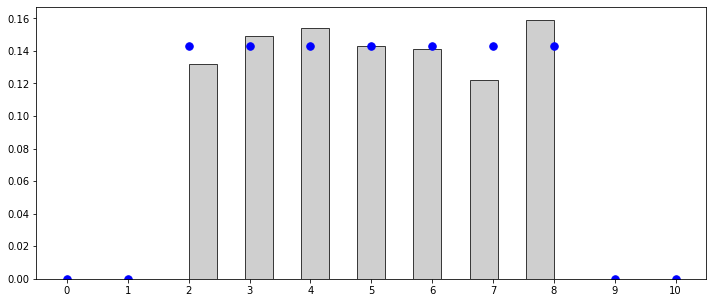

In [287]:
fig = plt.figure(figsize=(12, 5))

plt.plot(x, x_real, color='blue', marker='.', markersize=15, linestyle='')
plt.hist(x_sam, bins=len(x) + 2, weights=(1 / N) * np.ones(x_sam.shape), color='silver', edgecolor='k', alpha=0.75, align='mid')
plt.xticks(x)
plt.show()

### 4.2 Distribución de Bernoulli

Si un experimento sólo tiene dos posibles resultados y se tiene una variable aleatoria $X$ dada por el evento "obener resultado1 con una realización del experimento" (similar a "obener cara en un lanzamiento de moneda"), tenemos que la pdf está dada por

$$f_X(k) =  \left\{ \begin{matrix}
p & , & k=\textrm{éxito}\\
1-p & , & k=\textrm{fracaso}\end{matrix} \right.$$

Es necesario hacer notar que la probabilidad $p$ está dada para una ocurrencia particular, y suele asociarse con un "éxito". Además, una vez que se identifica el resultado que da un éxito, se puede asignar el valor $k=0$ al fracaso y $k=1$ al éxito. Así, una variable aleatoria con distribución de Bernoulli se denota por $X\sim\textrm{Ber}(p)$, con $p$ la probabilidad de éxito en ese experimento.

In [104]:
def bernoulli(k, p):
    if k == 0:
        return 1 - p
    elif k == 1:
        return p
    else:
        return 0

In [192]:
pr = 0.75
N = 1000

x = np.linspace(0, 3, 4)
x_real = []

for i in x:
    x_real.append(bernoulli(i, pr))

x_real = np.asarray(x_real)
x_sam = np.random.choice([0, 1], size=N, p=[1 - pr,  pr])

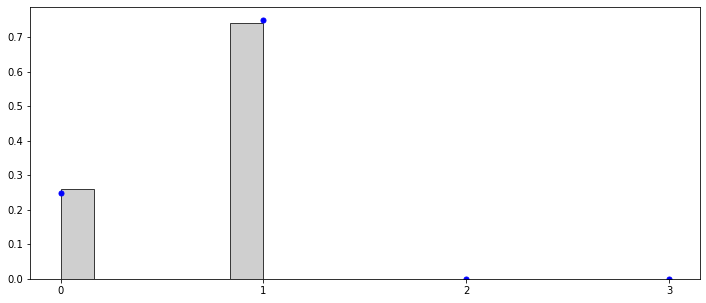

In [193]:
fig = plt.figure(figsize=(12, 5))

plt.plot(x, x_real, color='blue', marker='.', markersize=10, linestyle='')
plt.hist(x_sam, bins=len(x) + 2, weights=(1 / N) * np.ones(x_sam.shape), color='silver', edgecolor='k', alpha=0.75, align='mid')
plt.xticks(x)
plt.show()

### 4.2 Distribución Binomial

Supongamos que ahora tenemos el mismo experimento en donde sólo podemos obtener dos resultados, un éxito con probabilidad $p$ y un fracaso con probabilidad $1-p$, solo que esta vez queremos modelar la cantidad de éxitos que tendremos si repetimos el experimento $n$ veces. Esto define la distribución binomial, donde la variable aleatoria $X$ se describe como "la probabilidad de obtener $k$ éxitos en $n$ experimentos donde la probabilidad de un éxito es $p$". La pdf estará dada por

$$f_X(k) =  \left\{ \begin{matrix}
\binom{n}{k}p^k(1-p)^{n-k} & , & 0\le k\le n\\
0 & , & \sim\end{matrix} \right.$$

Se denota $X\sim\textrm{B}(n,p)$.

In [223]:
def fact(n):
    if n == 0 or n == 1:
        return 1
    else:
        prod = 1
        for i in range(1, n + 1):
            prod *= i
        return prod

def comb(n, k):
    return fact(n) / (fact(k) * fact(n - k))

def binomial(k, n, p):
    if 0 <= k <= n:
        return comb(n, k) * (p ** k) * (1 - p) ** (n - k)
    else:
        return 0

In [224]:
n = 25
pr = 0.75
N = 1000

x = np.linspace(0, 30, 31)
x_real = []

for i in x:
    x_real.append(binomial(int(i), n, pr))

x_real = np.asarray(x_real)
x_sam = np.random.binomial(n, pr, N)

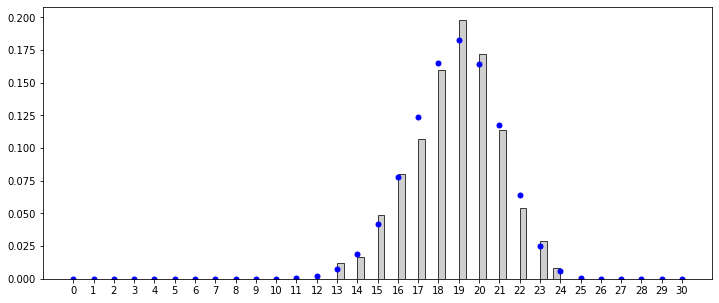

In [225]:
fig = plt.figure(figsize=(12, 5))

plt.plot(x, x_real, color='blue', marker='.', markersize=10, linestyle='')
plt.hist(x_sam, bins=len(x) + 2, weights=(1 / N) * np.ones(x_sam.shape), color='silver', edgecolor='k', alpha=0.75, align='mid')
plt.xticks(x)
plt.show()

### 4.3 Distribución Geométrica

Si, por el contrario al caso anterior, deseamos modelar la probabilidad de pasar por una cantidad de fracasos antes de obtener un éxito en nuestro experimento, utilizaremos la distribución geométrica, donde ahora la variable aleatoria $X$ se enuncia como "la probabilidad de tener que pasar por $k$ fracasos para obtener el primer éxito". Su pdf es

$$f_X(k) =  \left\{ \begin{matrix}
p(1-p)^{k-1} & , & k\in\mathbb{N}\\
0 & , & \sim\end{matrix} \right.$$

y se denota $X\sim\textrm{Geo}(p)$

In [237]:
def geometrica(k, p):
    if 1 <= k:
        return p * (1 - p) ** (k - 1)
    else:
        return 0

In [238]:
pr = 0.75
N = 1000

x = np.linspace(0, 15, 16)
x_real = []

for i in x:
    x_real.append(geometrica(int(i), pr))

x_real = np.asarray(x_real)
x_sam = np.random.geometric(pr, N)

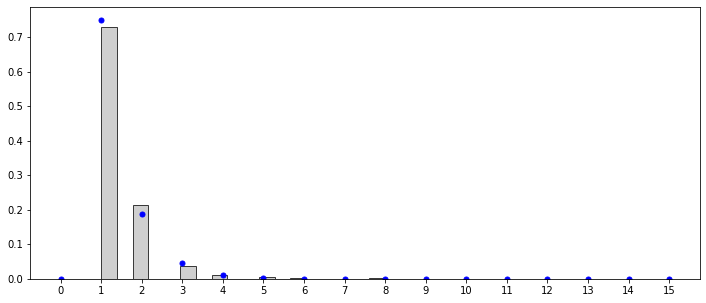

In [239]:
fig = plt.figure(figsize=(12, 5))

plt.plot(x, x_real, color='blue', marker='.', markersize=10, linestyle='')
plt.hist(x_sam, bins=len(x) + 2, weights=(1 / N) * np.ones(x_sam.shape), color='silver', edgecolor='k', alpha=0.75, align='mid')
plt.xticks(x)
plt.show()

### 4.4 Distribución Binomial negativa

Como extensión de la distribución geométrica, podríamos querer modelar la probabilidad de pasar por una cantidad de fracasos antes de obtener una cantidad determinada de éxitos en nuestro experimento, para lo cual se aplica la distribución binomial negativa, donde ahora la variable aleatoria $X$ se enuncia como "la probabilidad de tener que pasar por $k$ experimentos para obtener $r$ éxitos". Su pdf está dada por

$$f_X(k) =  \left\{ \begin{matrix}
\binom{k+r-1}{k}p^r(1-p)^{k} & , & k\in\mathbb{N}\\
0 & , & \sim\end{matrix} \right.$$

y se denota por $X\sim\textrm{BN}(r,p)$.

In [246]:
def binomial_negativa(k, r, p):
    if 0 <= k:
        return comb(k + r - 1, k) * (p ** r) * (1 - p) ** k
    else:
        return 0

In [247]:
pr = 0.75
r = 5
N = 1000

x = np.linspace(0, 15, 16)
x_real = []

for i in x:
    x_real.append(binomial_negativa(int(i), r, pr))

x_real = np.asarray(x_real)
x_sam = np.random.negative_binomial(r, pr, N)

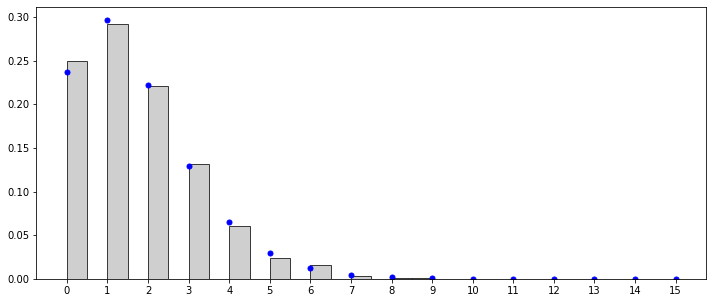

In [248]:
fig = plt.figure(figsize=(12, 5))

plt.plot(x, x_real, color='blue', marker='.', markersize=10, linestyle='')
plt.hist(x_sam, bins=len(x) + 2, weights=(1 / N) * np.ones(x_sam.shape), color='silver', edgecolor='k', alpha=0.75, align='mid')
plt.xticks(x)
plt.show()

### 4.5 Distribución de Poisson

Para terminar con las distribuciones discretas, vemos qué ocurre con la variable aleatoria $X$ dada por "la probabilidad de que un evento ocurra cierta cantidad de veces en el tiempo o espacio, dado que la frecuencia promedio de ocurrencias $\lambda$ es conocida". En ese caso, la pdf es

$$f_X(k) =  \left\{ \begin{matrix}
\frac{\lambda^ke^{-\lambda}}{k!} & , & k\in\mathbb{N}\\
0 & , & \sim\end{matrix} \right.$$

y se denota por $X\sim\textrm{Pois}(\lambda)$. Es necesario notar que, como $\lambda$ es una medida de frecuencia con unidad de medida dada, una transformación en el rango de tiempo en que se quiere medir la probabilidad implica una transformación en $\lambda$ apropiada.

In [249]:
def poisson(k, l):
    if 0 <= k:
        return (l ** k) * np.exp(-l) / fact(k)
    else:
        return 0

In [260]:
lam = 15
N = 1000

x = np.linspace(0, 35, 36)
x_real = []

for i in x:
    x_real.append(poisson(int(i), lam))

x_real = np.asarray(x_real)
x_sam = np.random.poisson(lam, N)

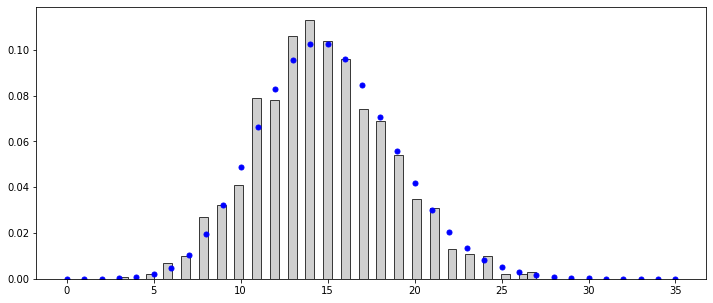

In [268]:
fig = plt.figure(figsize=(12, 5))

plt.plot(x, x_real, color='blue', marker='.', markersize=10, linestyle='')
plt.hist(x_sam, bins=len(x) + 11, weights=(1 / N) * np.ones(x_sam.shape), color='silver', edgecolor='k', alpha=0.75, align='mid')

plt.show()

## 5. Función de probabilidad continua

Supongamos ahora que la variable aleatoria con la que trabajamos puede tomar valores en un intervalo real, entre $a$ y $b$, siendo $a<b$ (eventualmente, de valor $\pm\infty$). Al haber "tantos" valores posibles para cualquier variable aleatoria de esta naturaleza, la probabilidad de que ocurra exactamente uno sólo de estos valores es despreciable, es decir

$$\mathbb{P}(X=x)=0$$

De este modo, la pdf no adquiere el sentido que antes tenía, pues la evaluación puntual siempre dará el resultado anterior. Sin embargo, puede aportar información de **cómo se concentra** la probabilidad de ocurrencias. La probabilidad se interpretará como el área que yace bajo esta pdf, lo cual define la CDF como

$$\mathbb{P}(X\le x)=\int_{-\infty}^xf_X(t)dt$$

Gracias a lo anterior, se puede deducir que

$$\mathbb{P}(a\le X\le b)=\int_{a}^bf_X(t)dt\qquad\textrm{y}\qquad \int_{-\infty}^{\infty}f_X(t)dt=1$$

Por ende, cualquier función continua no negativa que satisfaga lo anterior, es susceptible de representar una probabilidad. Como en este curso no se pide el requisito de saber cómo se calcula una integral como la anterior, se abordará este asunto desde el punto de vista numérico en el siguiente laboratorio por dos vertientes: la aproximación numérica clásica y los métodos Monte-Carlo.

### 5.1 Distribución uniforme continua

Similarmente con el caso discreto, esta distribución modela un fenómeno donde todos los resultados son igualmente probables, con la diferencia en que dichos resultados pueden pertenecer a todo un intervalo. Su pdf está dada por

$$f_X(x) =  \left\{ \begin{matrix}
\frac{1}{b-a} & , & x\in[a,b]\\
0 & , & \sim\end{matrix} \right.$$

De este modo, se tendrá que su CDF es

$$\mathbb{P}(X\le x) =  \left\{ \begin{matrix}
0 & , & x<a\\
\frac{x-a}{b-a} & , & x\in[a,b]\\
1 & , & x>b\end{matrix} \right.$$

Se denota por $X\sim\mathcal{U}(a,b)$.

In [294]:
def uniforme_continua(x, a, b):
    if a <= x <= b:
        return 1 / (b - a)
    else:
        return 0

In [299]:
a = 2
b = 8
N = 1000

x = np.linspace(0, 10, 1001)
x_real = []

for i in x:
    x_real.append(uniforme_continua(i, a, b))

x_real = np.asarray(x_real)
x_sam = np.random.uniform(a, b, N)

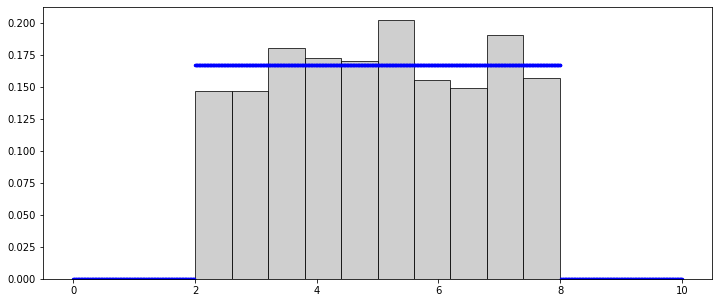

In [303]:
fig = plt.figure(figsize=(12, 5))

plt.plot(x, x_real, color='blue', marker='.', markersize=5, linestyle='')
plt.hist(x_sam, density=True, color='silver', edgecolor='k', alpha=0.75, align='mid')
plt.show()

### 5.2 Distribución exponencial

Esta distribución es una versión continua de la distribución de Poisson, en el sentido que modela la probabilidad de transcurrencia de cierto intervalo de tiempo entre dos ocurrencias consecutivas de un mismo evento, sabiendo que la frecuencia promedio de éstas es $\lambda$. Su pdf está dada por

$$f_X(x) =  \left\{ \begin{matrix}
\lambda e^{-\lambda x} & , & x\ge 0\\
0 & , & x<0\end{matrix} \right.$$

De este modo, su CDF queda dada por

$$\mathbb{P}(X\le x) =  \left\{ \begin{matrix}
0 & , & x<0\\
1-e^{-\lambda x} & , & x\ge0\end{matrix} \right.$$

Notar que $\mathbb{P}(X\le x)\longrightarrow1$ cuando $x\longrightarrow\infty$. Se denota $X\sim\textrm{E}(\lambda)$.

In [304]:
def exponencial(x, l):
    if 0 <= x:
        return l * np.exp(-l * x)
    else:
        return 0

In [316]:
lam = 4
N = 1000

x = np.linspace(0, 2, 1001)
x_real = []

for i in x:
    x_real.append(exponencial(i, lam))

x_real = np.asarray(x_real)
x_sam = np.random.exponential(1 / lam, N)

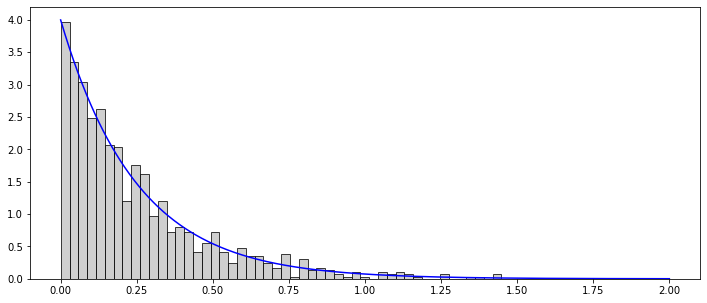

In [318]:
fig = plt.figure(figsize=(12, 5))

plt.plot(x, x_real, color='blue', linestyle='-')
plt.hist(x_sam, bins=50, density=True, color='silver', edgecolor='k', alpha=0.75, align='mid')
plt.show()

### 5.3 Distribución normal

Ésta es, quizás, la distribución más importante en el análisis de datos y en los estudios de carácter estocástico. Las razones para ello se entienden estudiando en mayor profundidad resultados como el Teorema de los Grandes Números, en que se establece condiciones para las que un experimento realizado numerosas veces pueda ser modelado por este tipo de distribución. De forma más sencilla, puede verse como una versión continua de la distribución binomial, y su pdf responde a

$$f_X(x) =  \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Este es el primer caso en que la CDF no puede calcularse de forma analítica para cada valor de $x$, razón por la que se hace necesario el uso de tablas de valores o métodos de integración. Se denota por $X\sim\mathcal{N}(\mu,\sigma^2)$.

In [333]:
def normal(x, mu, sigma):
    return (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

In [339]:
mu = 6
sigma = 2
N = 10000

x = np.linspace(-2, 15, 1001)
x_real = []

for i in x:
    x_real.append(normal(i, mu, sigma))

x_real = np.asarray(x_real)
x_sam = np.random.normal(mu, sigma, N)

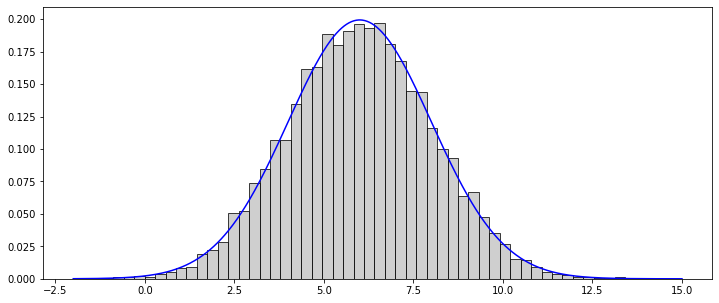

In [340]:
fig = plt.figure(figsize=(12, 5))

plt.plot(x, x_real, color='blue', linestyle='-')
plt.hist(x_sam, bins=50, density=True, color='silver', edgecolor='k', alpha=0.75, align='mid')
plt.show()

## Ejercicios

**1.-** Para la lista de distribuciones mencionadas, averigüe el significado y el valor de los siguientes términos:

**a)** Esperanza (*mean*)
<br>
**b)** Varianza (*variance*)
<br>
**c)** Mediana (*median*)
<br>
**d)** Moda (*mode*)
<br>
<br>
¿Cómo interpreta estos valores?

**2.-** Para las distribuciones vistas, realice el siguiente experimento:

**a)** Encuentre el valor de su esperanza
<br>
**b)** Realice un muestreo aleatorio de tamaño $N$ a su elección (ojalá $N\ge100$).
<br>
**c)** Calcule y grafique la cantidad $\frac{1}{k}\sum_{i=1}^kx_i$, para $k$ desde $1$ hasta $N$. Puede utilizar los comandos
```Python
# x tiene que estar definido desde antes como una muestra aleatoria de su elección, con N puntos
suma = []
for i in range(N):
    s = np.mean(x[:i])
    suma.append(s)
```
Superponga a este gráfico el valor constante encontrado para la esperanza. ¿Cómo se comportan estas cantidades?